In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib notebook

In [2]:
#Import CSV to Dataframe
gdp_all = pd.read_csv("gdp.csv")
gdp_all

,Entity,Code,Year,GDP per capita (constant 2011 international $),Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0
...,...,...,...,...,...,...
48115,Zimbabwe,ZWE,2015,1912.280261,3.703191,13815000.0
48116,Zimbabwe,ZWE,2016,1879.628119,3.735400,14030000.0
48117,Zimbabwe,ZWE,2017,1899.774977,3.638300,14237000.0
48118,Zimbabwe,ZWE,2018,NaN,3.616480,14439000.0


In [3]:
#Delete unwanted columns
#del gdp_df['Unnamed: 5']
del gdp_all['Code']
gdp_all


,Entity,Year,GDP per capita (constant 2011 international $),Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5
0,Afghanistan,1800,NaN,NaN,3280000.0
1,Afghanistan,1801,NaN,NaN,3280000.0
2,Afghanistan,1802,NaN,NaN,3280000.0
3,Afghanistan,1803,NaN,NaN,3280000.0
4,Afghanistan,1804,NaN,NaN,3280000.0
...,...,...,...,...,...
48115,Zimbabwe,2015,1912.280261,3.703191,13815000.0
48116,Zimbabwe,2016,1879.628119,3.735400,14030000.0
48117,Zimbabwe,2017,1899.774977,3.638300,14237000.0
48118,Zimbabwe,2018,NaN,3.616480,14439000.0


In [4]:
#Set new Columns
gdp_all.columns=['Country','Year','GDP','Happy','Population']
gdp_all

,Country,Year,GDP,Happy,Population
0,Afghanistan,1800,NaN,NaN,3280000.0
1,Afghanistan,1801,NaN,NaN,3280000.0
2,Afghanistan,1802,NaN,NaN,3280000.0
3,Afghanistan,1803,NaN,NaN,3280000.0
4,Afghanistan,1804,NaN,NaN,3280000.0
...,...,...,...,...,...
48115,Zimbabwe,2015,1912.280261,3.703191,13815000.0
48116,Zimbabwe,2016,1879.628119,3.735400,14030000.0
48117,Zimbabwe,2017,1899.774977,3.638300,14237000.0
48118,Zimbabwe,2018,NaN,3.616480,14439000.0


In [6]:
#Make list of the countries to lookup and bring it up in DF
country_list = ["Finland", "Denmark", "Norway", "Iceland", "Netherlands", "Switzerland", "Syria", "Malawi", "Yemen", "Tanzania", "Afghanistan", "South Sudan"]
gdp_df = gdp_all.loc[gdp_all['Country'].isin(country_list)]
gdp_df

,Country,Year,GDP,Happy,Population
0,Afghanistan,1800,NaN,NaN,3280000.0
1,Afghanistan,1801,NaN,NaN,3280000.0
2,Afghanistan,1802,NaN,NaN,3280000.0
3,Afghanistan,1803,NaN,NaN,3280000.0
4,Afghanistan,1804,NaN,NaN,3280000.0
...,...,...,...,...,...
47675,Yemen,2015,2308.636584,2.982674,26498000.0
47676,Yemen,2016,1479.147005,3.825631,27168000.0
47677,Yemen,2017,NaN,3.253560,27835000.0
47678,Yemen,2018,NaN,3.057514,28499000.0


In [7]:
# Get Values for Years, hours and gdp for Multi y axiz plot
years = gdp_df['Year']
happy = gdp_df['Happy']
gdp = gdp_df['GDP']

In [ ]:
x = np.arange(1950, 2021, 1)


In [ ]:
#Create 2 y axis to plot GDP and Hours over Time

x = years
y1 = happy
y2 = gdp

plt.figure(figsize=(20, 5))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'r-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Years')
ax1.set_ylabel('Hours', color='r')
ax2.set_ylabel('GDP', color='b')

#plt.show()

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(years, gdp, color='green')

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(years, hours, color='r', alpha=0.2, align="center")


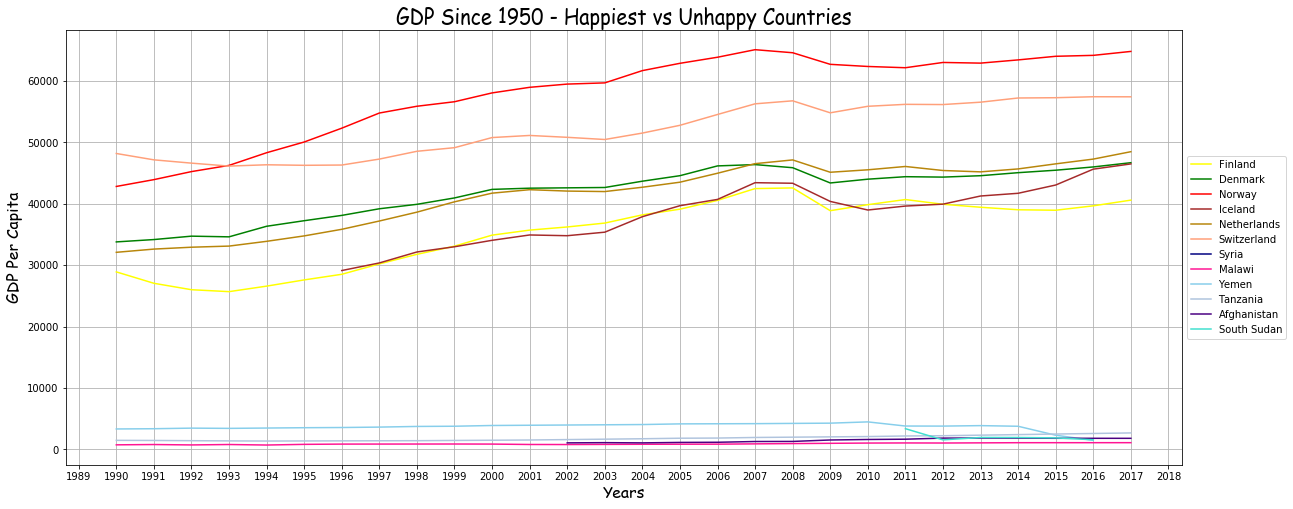

In [34]:
plt.figure(figsize=(20,8))
# GDP over time for each country
aus_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Finland']['Year'],gdp_df.loc[gdp_df['Country']=='Finland']['GDP'],color="yellow",label="Finland")
bra_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Denmark']['Year'],gdp_df.loc[gdp_df['Country']=='Denmark']['GDP'],color="green",label="Denmark")
chn_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Norway']['Year'],gdp_df.loc[gdp_df['Country']=='Norway']['GDP'],color="red",label="Norway")
mex_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Iceland']['Year'],gdp_df.loc[gdp_df['Country']=='Iceland']['GDP'],color="brown",label="Iceland")
nga_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Netherlands']['Year'],gdp_df.loc[gdp_df['Country']=='Netherlands']['GDP'],color="darkgoldenrod",label="Netherlands")
pol_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Switzerland']['Year'],gdp_df.loc[gdp_df['Country']=='Switzerland']['GDP'],color="lightsalmon",label="Switzerland")
rus_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Syria']['Year'],gdp_df.loc[gdp_df['Country']=='Syria']['GDP'],color="navy",label="Syria")
zaf_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Malawi']['Year'],gdp_df.loc[gdp_df['Country']=='Malawi']['GDP'],color="deeppink",label="Malawi")
kor_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Yemen']['Year'],gdp_df.loc[gdp_df['Country']=='Yemen']['GDP'],color="skyblue",label="Yemen")
swe_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Tanzania']['Year'],gdp_df.loc[gdp_df['Country']=='Tanzania']['GDP'],color="lightsteelblue",label="Tanzania")
usa_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='Afghanistan']['Year'],gdp_df.loc[gdp_df['Country']=='Afghanistan']['GDP'],color="indigo",label="Afghanistan")
ven_handle,=plt.plot(gdp_df.loc[gdp_df['Country']=='South Sudan']['Year'],gdp_df.loc[gdp_df['Country']=='South Sudan']['GDP'],color="turquoise",label="South Sudan")
# titles and labels
plt.title("GDP Since 1950 - Happiest vs Unhappy Countries",fontsize=20,fontname ="Comic Sans MS")
plt.xlabel("Years",fontsize=16,fontname ="Comic Sans MS")
plt.ylabel("GDP Per Capita",fontsize=16,fontname ="Comic Sans MS")
# places legend outside plot
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.grid()
plt.show()

In [ ]:
gdp_df = gdp_df.dropna(how='all')
gdp_df

In [12]:
gdp_countries = gdp_df['GDP']
happy_countries = gdp_df['Happy']


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
47675    2.982674
47676    3.825631
47677    3.253560
47678    3.057514
47679         NaN
Name: Happy, Length: 2640, dtype: float64

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
47675    2308.636584
47676    1479.147005
47677            NaN
47678            NaN
47679            NaN
Name: GDP, Length: 2640, dtype: float64

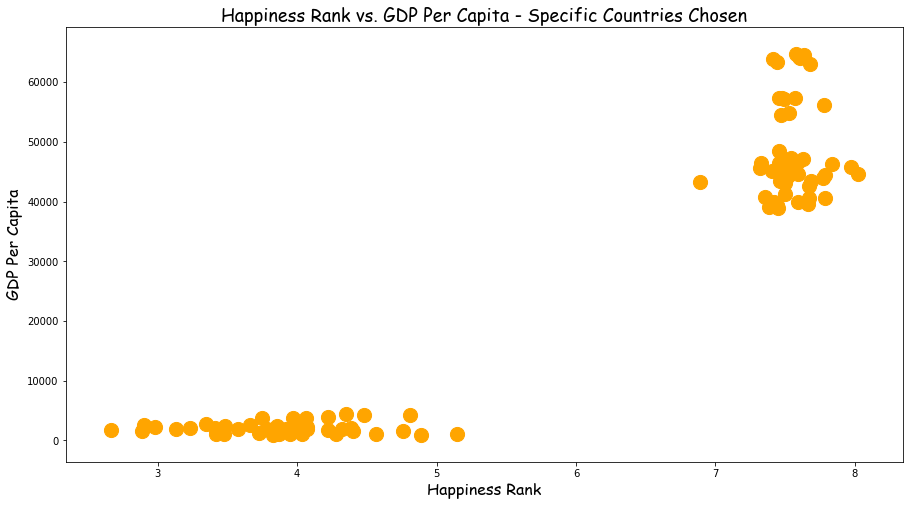

In [35]:
x_value = happy_countries
y_value = gdp_countries

plt.figure(figsize=(15,8))

stats = linregress(x_value, y_value)

m = stats.slope
b = stats.intercept

plt.scatter(x_value, y_value)
plt.plot(x_value, m * x_value + b, color="red")

plt.title("Happiness Rank vs. GDP Per Capita - Specific Countries Chosen",fontsize=18,fontname ="Comic Sans MS")
plt.xlabel("Happiness Rank",fontsize=16,fontname ="Comic Sans MS")
plt.ylabel("GDP Per Capita",fontsize=16,fontname ="Comic Sans MS")


plt.scatter(x_value,y_value,color='orange',marker="o",s=200)


In [15]:
gdp_world = gdp_all['GDP']
happy_world = gdp_all['Happy']


Text(0, 0.5, 'GDP Per Capita')

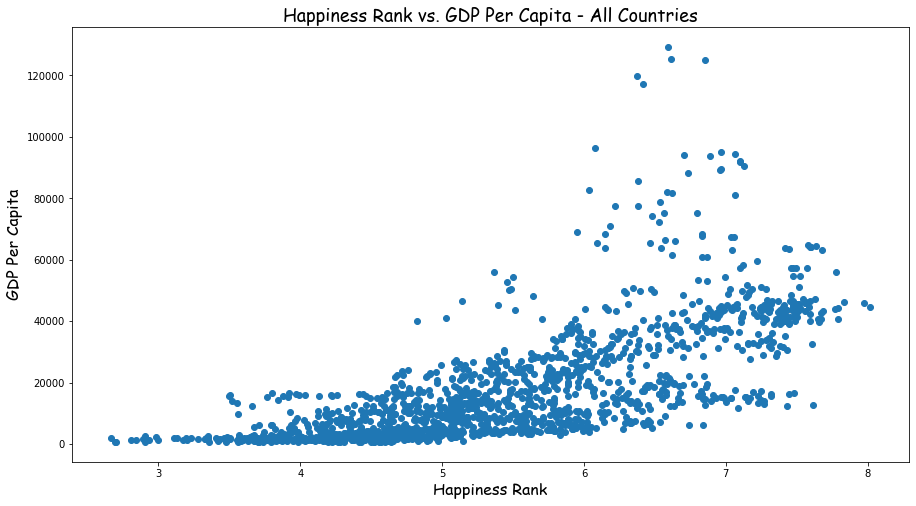

In [18]:
x_value = happy_world
y_value = gdp_world

plt.figure(figsize=(15,8))

stats = linregress(x_value, y_value)

m = stats.slope
b = stats.intercept

plt.scatter(x_value, y_value)
plt.plot(x_value, m * x_value + b, color="red")

plt.title("Happiness Rank vs. GDP Per Capita - All Countries",fontsize=18,fontname ="Comic Sans MS")
plt.xlabel("Happiness Rank",fontsize=16,fontname ="Comic Sans MS")
plt.ylabel("GDP Per Capita",fontsize=16,fontname ="Comic Sans MS")

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors


fig, ax = plt.subplots()

colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(gdp_df['Country']))]

for i,c in enumerate(colorlist):

    x = gdp_df['Happy'][i]
    y = gdp_df['GDP'][i]
    l = gdp_df['Country'][i]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)

ax.legend()

plt.show()

 ...]

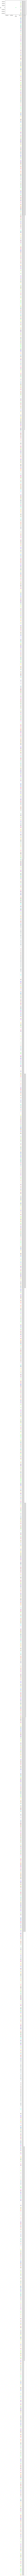

In [26]:
import matplotlib.cm as cm
import matplotlib.colors as colors

colorlist = list(colors.ColorConverter.colors.keys())
fig, ax = plt.subplots()
[gdp_df.iloc[[i]].plot.scatter('Happy', 'GDP', ax=ax, s=50, label=l, color=colorlist[i % len(colorlist)])
 for i,l in enumerate(gdp_df.Country)]